# Chapter 11: Models for Object Detection and Image Segmentation

## 11.3 Models

### 11.3.4 Faster R-CNN and Mask R-CNN

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step1.png)

In [4]:
from torchvision.models import get_weight

weights = get_weight('FasterRCNN_ResNet50_FPN_Weights.DEFAULT')

In [5]:
import numpy as np

categories = np.array(weights.meta['categories'])
categories

array(['__background__', 'person', 'bicycle', 'car', 'motorcycle',
       'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
       'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench',
       'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
       'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
       'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard',
       'sports ball', 'kite', 'baseball bat', 'baseball glove',
       'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A',
       'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana',
       'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
       'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
       'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv',
       'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
       'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock',
       'vase', 

In [6]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(weights=weights)
model

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 80.2MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
!wget https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/FudanPed00042.png

In [12]:
from torchvision.datapoints import Image
from torchvision.io import read_image

image_tensor = read_image('FudanPed00042.png')
wrapped_image = Image(image_tensor) # that's datapoints.Image, not PIL Image

In [13]:
image = weights.transforms()(wrapped_image)
image

tensor([[[0.8471, 0.8392, 0.8275,  ..., 0.9412, 0.7686, 0.6549],
         [0.8667, 0.8627, 0.8549,  ..., 0.9373, 0.7647, 0.6510],
         [0.8863, 0.8824, 0.8784,  ..., 0.9294, 0.7569, 0.6471],
         ...,
         [0.4549, 0.4588, 0.4627,  ..., 0.4000, 0.3804, 0.3608],
         [0.4784, 0.4824, 0.4902,  ..., 0.3765, 0.3255, 0.2902],
         [0.4980, 0.5020, 0.5098,  ..., 0.3373, 0.2667, 0.2235]],

        [[0.8000, 0.7922, 0.7804,  ..., 0.8980, 0.7255, 0.6118],
         [0.8078, 0.8039, 0.7961,  ..., 0.8941, 0.7216, 0.6078],
         [0.8196, 0.8157, 0.8118,  ..., 0.8863, 0.7137, 0.6039],
         ...,
         [0.4549, 0.4588, 0.4667,  ..., 0.3647, 0.3490, 0.3294],
         [0.4784, 0.4824, 0.4941,  ..., 0.3294, 0.2863, 0.2510],
         [0.4980, 0.5020, 0.5137,  ..., 0.2902, 0.2275, 0.1843]],

        [[0.8157, 0.8078, 0.7961,  ..., 0.8275, 0.6549, 0.5412],
         [0.8353, 0.8314, 0.8235,  ..., 0.8235, 0.6510, 0.5373],
         [0.8588, 0.8549, 0.8510,  ..., 0.8157, 0.6431, 0.

In [14]:
model.eval()
pred = model([image])

In [15]:
pred_boxes = pred[0]['boxes']
pred_labels = pred[0]['labels']
pred_scores = pred[0]['scores']
pred_labels, pred_scores

(tensor([ 1,  1,  1,  6,  1,  1,  1,  2, 31,  1,  1, 62, 77, 62,  1,  6,  1,  2,
          8,  2,  2,  3,  1,  1,  2,  2, 77,  1, 62,  1,  3, 31,  2,  1,  1,  1,
         77, 62, 47,  6,  3,  2,  1,  2,  1,  6, 62,  2,  8, 62, 77, 31, 31,  2,
          1,  2,  2,  1, 15, 33,  1,  2]),
 tensor([0.9996, 0.9983, 0.9973, 0.9746, 0.9525, 0.9412, 0.9089, 0.8985, 0.8838,
         0.8597, 0.7399, 0.6795, 0.6014, 0.5764, 0.5515, 0.5278, 0.4802, 0.4519,
         0.3813, 0.3654, 0.3571, 0.3006, 0.2887, 0.2627, 0.2523, 0.2412, 0.2330,
         0.2220, 0.2134, 0.2130, 0.2128, 0.1975, 0.1919, 0.1505, 0.1474, 0.1336,
         0.1279, 0.1265, 0.1171, 0.1053, 0.1040, 0.1002, 0.0984, 0.0905, 0.0893,
         0.0884, 0.0881, 0.0878, 0.0806, 0.0799, 0.0783, 0.0755, 0.0739, 0.0716,
         0.0708, 0.0704, 0.0692, 0.0681, 0.0663, 0.0650, 0.0594, 0.0504],
        grad_fn=<IndexBackward0>))

In [16]:
categories[pred_labels[pred_scores >= .9]]

array(['person', 'person', 'person', 'bus', 'person', 'person', 'person'],
      dtype='<U14')

In [17]:
high_score_boxes = pred_boxes[(pred_scores >= .9)]
high_score_boxes

tensor([[153.6986, 182.9845, 249.8504, 480.3208],
        [288.8786, 157.5692, 387.5208, 459.2674],
        [503.5206, 173.6245, 587.6513, 543.5108],
        [  0.0000,   0.0000, 132.2605, 468.0171],
        [381.6109, 177.3511, 472.0451, 313.1616],
        [447.8536, 268.0893, 544.9938, 534.9994],
        [248.8264, 270.2439, 297.6031, 340.2530]], grad_fn=<IndexBackward0>)

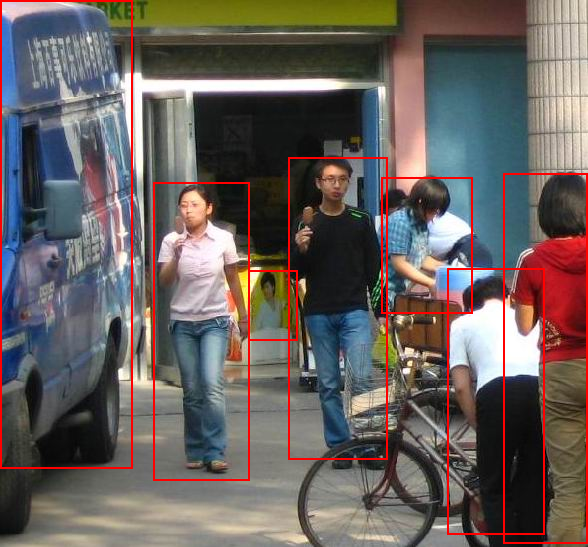

In [18]:
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms import ToPILImage

result = draw_bounding_boxes(image_tensor, high_score_boxes, colors=['red']*high_score_boxes.shape[0], width=2)
ToPILImage()(result)

#### 11.3.4.1 Architecture

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch11/rpn_paper.png)

In [19]:
import torch
from torchvision.datapoints import Image, BoundingBox, BoundingBoxFormat

boxes = torch.tensor([[158., 185., 249., 469.], [287., 155., 391., 448.]])

image_hw = image_tensor.shape[-2:]
wrapped_boxes = BoundingBox(boxes, format=BoundingBoxFormat.XYXY, spatial_size=image_hw)

labels = torch.tensor([1, 1], dtype=torch.int64)

target = {'boxes': wrapped_boxes, 'labels': labels}

In [20]:
transform_fn = weights.transforms()
transform_fn

ObjectDetection()

In [21]:
xs_from_dl = transform_fn(wrapped_image)
xs_from_dl

tensor([[[0.8471, 0.8392, 0.8275,  ..., 0.9412, 0.7686, 0.6549],
         [0.8667, 0.8627, 0.8549,  ..., 0.9373, 0.7647, 0.6510],
         [0.8863, 0.8824, 0.8784,  ..., 0.9294, 0.7569, 0.6471],
         ...,
         [0.4549, 0.4588, 0.4627,  ..., 0.4000, 0.3804, 0.3608],
         [0.4784, 0.4824, 0.4902,  ..., 0.3765, 0.3255, 0.2902],
         [0.4980, 0.5020, 0.5098,  ..., 0.3373, 0.2667, 0.2235]],

        [[0.8000, 0.7922, 0.7804,  ..., 0.8980, 0.7255, 0.6118],
         [0.8078, 0.8039, 0.7961,  ..., 0.8941, 0.7216, 0.6078],
         [0.8196, 0.8157, 0.8118,  ..., 0.8863, 0.7137, 0.6039],
         ...,
         [0.4549, 0.4588, 0.4667,  ..., 0.3647, 0.3490, 0.3294],
         [0.4784, 0.4824, 0.4941,  ..., 0.3294, 0.2863, 0.2510],
         [0.4980, 0.5020, 0.5137,  ..., 0.2902, 0.2275, 0.1843]],

        [[0.8157, 0.8078, 0.7961,  ..., 0.8275, 0.6549, 0.5412],
         [0.8353, 0.8314, 0.8235,  ..., 0.8235, 0.6510, 0.5373],
         [0.8588, 0.8549, 0.8510,  ..., 0.8157, 0.6431, 0.

In [22]:
transform_fn(wrapped_image, target)

TypeError: ignored

In [24]:
import torchvision.transforms.v2 as transforms # new v2

transform_fn = transforms.Compose([transforms.ToImageTensor(),
                                   transforms.ConvertImageDtype()])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)


In [25]:
transform_fn = transforms.ConvertImageDtype()

In [26]:
transform_fn(wrapped_image, target)

(Image([[[0.8471, 0.8392, 0.8275,  ..., 0.9412, 0.7686, 0.6549],
         [0.8667, 0.8627, 0.8549,  ..., 0.9373, 0.7647, 0.6510],
         [0.8863, 0.8824, 0.8784,  ..., 0.9294, 0.7569, 0.6471],
         ...,
         [0.4549, 0.4588, 0.4627,  ..., 0.4000, 0.3804, 0.3608],
         [0.4784, 0.4824, 0.4902,  ..., 0.3765, 0.3255, 0.2902],
         [0.4980, 0.5020, 0.5098,  ..., 0.3373, 0.2667, 0.2235]],
 
        [[0.8000, 0.7922, 0.7804,  ..., 0.8980, 0.7255, 0.6118],
         [0.8078, 0.8039, 0.7961,  ..., 0.8941, 0.7216, 0.6078],
         [0.8196, 0.8157, 0.8118,  ..., 0.8863, 0.7137, 0.6039],
         ...,
         [0.4549, 0.4588, 0.4667,  ..., 0.3647, 0.3490, 0.3294],
         [0.4784, 0.4824, 0.4941,  ..., 0.3294, 0.2863, 0.2510],
         [0.4980, 0.5020, 0.5137,  ..., 0.2902, 0.2275, 0.1843]],
 
        [[0.8157, 0.8078, 0.7961,  ..., 0.8275, 0.6549, 0.5412],
         [0.8353, 0.8314, 0.8235,  ..., 0.8235, 0.6510, 0.5373],
         [0.8588, 0.8549, 0.8510,  ..., 0.8157, 0.6431, 

#### 11.3.4.2 `transform`: Preprocessing

In [27]:
model.train()

model.transform

GeneralizedRCNNTransform(
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    Resize(min_size=(800,), max_size=1333, mode='bilinear')
)

In [28]:
transf_images, transf_targets = model.transform([xs_from_dl], [target])
transf_images.image_sizes, transf_images.tensors

([(800, 859)],
 tensor([[[[ 1.5810,  1.5630,  1.5359,  ...,  0.0000,  0.0000,  0.0000],
           [ 1.6260,  1.6127,  1.5918,  ...,  0.0000,  0.0000,  0.0000],
           [ 1.6846,  1.6756,  1.6610,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [-0.0502, -0.0412, -0.0266,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0119,  0.0210,  0.0363,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.0569,  0.0660,  0.0813,  ...,  0.0000,  0.0000,  0.0000]],
 
          [[ 1.5357,  1.5173,  1.4896,  ...,  0.0000,  0.0000,  0.0000],
           [ 1.5541,  1.5405,  1.5192,  ...,  0.0000,  0.0000,  0.0000],
           [ 1.5817,  1.5725,  1.5576,  ...,  0.0000,  0.0000,  0.0000],
           ...,
           [ 0.0781,  0.0874,  0.1060,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.1417,  0.1509,  0.1703,  ...,  0.0000,  0.0000,  0.0000],
           [ 0.1877,  0.1969,  0.2163,  ...,  0.0000,  0.0000,  0.0000]],
 
          [[ 1.8208,  1.8025,  1.7749,  ...,  0.0000,  0.0000,  0.0000]

In [29]:
original_image_sizes = []
for img in [xs_from_dl]:
    val = img.shape[-2:]
    original_image_sizes.append((val[0], val[1]))

original_image_sizes

[(547, 588)]

#### 11.3.4.3 `backbone`: Base Model and Feature Pyramid Network (FPN)

In [30]:
resp_body = model.backbone.body(transf_images.tensors)
resp_body.keys(), [v.shape for v in resp_body.values()]

(odict_keys(['0', '1', '2', '3']),
 [torch.Size([1, 256, 200, 216]),
  torch.Size([1, 512, 100, 108]),
  torch.Size([1, 1024, 50, 54]),
  torch.Size([1, 2048, 25, 27])])

In [31]:
# makes out channels 256 for every feature
model.backbone.fpn

FeaturePyramidNetwork(
  (inner_blocks): ModuleList(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    )
    (3): Conv2dNormActivation(
      (0): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    )
  )
  (layer_blocks): ModuleList(
    (0-3): 4 x Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
  )
  (extra_blocks): LastLevelMaxPool()
)

In [32]:
features = model.backbone.fpn(resp_body)
features.keys(), [v.shape for v in features.values()]

(odict_keys(['0', '1', '2', '3', 'pool']),
 [torch.Size([1, 256, 200, 216]),
  torch.Size([1, 256, 100, 108]),
  torch.Size([1, 256, 50, 54]),
  torch.Size([1, 256, 25, 27]),
  torch.Size([1, 256, 13, 14])])

In [33]:
model.backbone.out_channels

256

In [34]:
if isinstance(features, torch.Tensor):
    features = OrderedDict([("0", features)])

#### 11.3.4.4 `rpn`: Region Proposal Network

In [35]:
model.rpn

RegionProposalNetwork(
  (anchor_generator): AnchorGenerator()
  (head): RPNHead(
    (conv): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): ReLU(inplace=True)
      )
    )
    (cls_logits): Conv2d(256, 3, kernel_size=(1, 1), stride=(1, 1))
    (bbox_pred): Conv2d(256, 12, kernel_size=(1, 1), stride=(1, 1))
  )
)

In [36]:
model.rpn.anchor_generator.sizes, model.rpn.anchor_generator.aspect_ratios

(((32,), (64,), (128,), (256,), (512,)),
 ((0.5, 1.0, 2.0),
  (0.5, 1.0, 2.0),
  (0.5, 1.0, 2.0),
  (0.5, 1.0, 2.0),
  (0.5, 1.0, 2.0)))

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch11/anchors-centers.png)

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch11/anchors_paper.png)

In [37]:
proposals, proposal_losses = model.rpn(transf_images, features, transf_targets)

In [38]:
proposals, proposal_losses

([tensor([[658.8484, 366.1876, 814.5435, 792.4978],
          [688.4003, 297.1996, 848.2238, 800.0000],
          [223.9525, 265.2068, 366.4737, 716.3390],
          ...,
          [415.4728, 235.8373, 463.9001, 352.1774],
          [748.5613, 357.9511, 780.6770, 394.9054],
          [329.7100, 422.4762, 365.6756, 473.8938]])],
 {'loss_objectness': tensor(0.0398, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  'loss_rpn_box_reg': tensor(0.0007, grad_fn=<DivBackward0>)})

#### 11.3.4.5 `roi_heads`: Regions of Interest

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch11/roi_pooling.jpg)

In [39]:
model.roi_heads

RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)
  (box_head): TwoMLPHead(
    (fc6): Linear(in_features=12544, out_features=1024, bias=True)
    (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (box_predictor): FastRCNNPredictor(
    (cls_score): Linear(in_features=1024, out_features=91, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
  )
)

In [40]:
model.roi_heads.box_roi_pool

MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)

In [41]:
model.roi_heads.box_predictor

FastRCNNPredictor(
  (cls_score): Linear(in_features=1024, out_features=91, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
)

In [42]:
detections, detector_losses = model.roi_heads(features, proposals, transf_images.image_sizes, transf_targets)
detections, detector_losses

([],
 {'loss_classifier': tensor(0.2603, grad_fn=<NllLossBackward0>),
  'loss_box_reg': tensor(0.0263, grad_fn=<DivBackward0>)})

In [43]:
model.eval()
detections, detector_losses = model.roi_heads(features, proposals, transf_images.image_sizes, transf_targets)
detections[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

#### 11.3.4.6 `transform`: Postprocessing

In [44]:
model.transform.postprocess

<bound method GeneralizedRCNNTransform.postprocess of GeneralizedRCNNTransform(
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    Resize(min_size=(800,), max_size=1333, mode='bilinear')
)>

In [45]:
detections = model.transform.postprocess(detections, transf_images.image_sizes, original_image_sizes)
detections[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

### 11.3.5 Custom Faster R-CNN Model

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

# 1. Creating FastRCNNPredictor
in_features_box = model.roi_heads.box_predictor.cls_score.in_features
num_classes = 2 # 0 background / 1 people in the Penn-Fudan dataset

new_head = FastRCNNPredictor(in_channels=in_features_box, num_classes=num_classes)

# 2. Replacing the existing head
model.roi_heads.box_predictor = new_head

In [ ]:
from torchvision.models.detection import FasterRCNN
from torchvision.models import mobilenet_v2, get_weight
from torchvision.ops import MultiScaleRoIAlign
from torchvision.models.detection.rpn import AnchorGenerator

# 1. Choose a computer vision model
weights = get_weight('MobileNet_V2_Weights.DEFAULT')
mobilenet = mobilenet_v2(weights=weights)

# 2. Create a new backbone
new_backbone = mobilenet.features
new_backbone.out_channels = 1280

# 3. Create an anchor generator
sizes = ((32, 64, 128, 256, 512),)
aspect_ratios = ((0.5, 1.0, 2.0),)
anchor_generator = AnchorGenerator(sizes=sizes, aspect_ratios=aspect_ratios)

# 4. Create a ROI pooler
roi_pooler = MultiScaleRoIAlign(featmap_names=['0'], output_size=7, sampling_ratio=2)

# 5. Create an instance of FasterRCNN
num_classes = 2 # 0 background / 1 people in the Penn-Fudan dataset
model = FasterRCNN(new_backbone,
                   rpn_anchor_generator=anchor_generator,
                   box_roi_pool=roi_pooler,
                   num_classes=num_classes)

### 11.3.6 Custom Mask R-CNN Model

In [6]:
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
model = maskrcnn_resnet50_fpn(weights=weights)

In [7]:
model.roi_heads

RoIHeads(
  (box_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(7, 7), sampling_ratio=2)
  (box_head): TwoMLPHead(
    (fc6): Linear(in_features=12544, out_features=1024, bias=True)
    (fc7): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (box_predictor): FastRCNNPredictor(
    (cls_score): Linear(in_features=1024, out_features=91, bias=True)
    (bbox_pred): Linear(in_features=1024, out_features=364, bias=True)
  )
  (mask_roi_pool): MultiScaleRoIAlign(featmap_names=['0', '1', '2', '3'], output_size=(14, 14), sampling_ratio=2)
  (mask_head): MaskRCNNHeads(
    (0): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (1): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
    )
    (2): Conv2dNormActivation(
      (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), pad

In [ ]:
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor

# 1. Creating FastRCNNPredictor
num_classes = 2 # 0 background / 1 people in the Penn-Fudan dataset
in_features_box = model.roi_heads.box_predictor.cls_score.in_features
new_head_boxes = FastRCNNPredictor(in_features_box, num_classes)

# 2. Replacing the existing head
model.roi_heads.box_predictor = new_head_boxes

# 3. Creating MaskRCNNPredictor
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
new_head_masks = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

# 4. Replacing the second head
model.roi_heads.mask_predictor = new_head_masks

### 11.3.7 Learning Rate Schedulers

![](https://raw.githubusercontent.com/dvgodoy/assets/main/PyTorchInPractice/images/ch0/model_step3.png)

In [4]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, LinearLR

optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

In [5]:
def get_lr(optimizer):
    return list(map(lambda d: d['lr'], optimizer.state_dict()['param_groups']))

get_lr(optimizer)

[0.005]

In [6]:
lr_scheduler = StepLR(optimizer, step_size=3, gamma=0.1)

warmup_factor = 1.0 / 1000
warmup_iters = 1000
lr_scheduler2 = LinearLR(optimizer, start_factor=warmup_factor, total_iters=warmup_iters)

In [7]:
# Recreating everything here, so you don't have to re-run the previous code
# if you want to try different configurations or places in the loop
optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
lr_scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
lr_scheduler2 = LinearLR(optimizer, start_factor=warmup_factor, total_iters=warmup_iters)

num_epochs = 5

lrs = []

for epoch in range(num_epochs):
    for i in range(1000):
        if epoch == 0:
            lr_scheduler2.step()

        lrs.append(get_lr(optimizer)[0])

    lr_scheduler.step()

/home/dvgodoy/anaconda3/envs/ptip/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:138: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


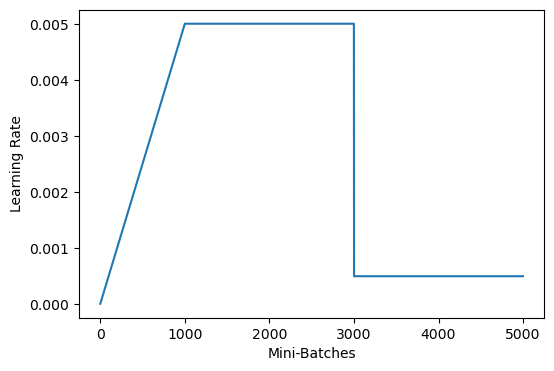

In [12]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.plot(lrs)
ax.set_xlabel('Mini-Batches')
ax.set_ylabel('Learning Rate')
fig.savefig('lr_schedule.png', dpi=300)